# Linear Regression Lab

Linear regression is a supervised learning problem. <br>
Linear Regression is used to predict the value of a dependent variable $y$ based on a given set of independent variables $X$ (predictor variables).
### Task :
Given numerical dataset $(X, y)$, build a model to predict (or estimate) a real-value output. <br>
Real values are known for the examples used to build the model $\implies$ Supervised learning problem. <br>

<img src="learning_regression.png" width="300">

### Model Representation

In the case of linear regresssion with multiple variables, the training dataset $(X, y)$ contains $m$ examples and $n$ attributes (variables). <br>
Each example $x^i \in \mathbb{R}^{1xn}$ is labled by a real value $y^i \in \mathbb{R}$ : <br>
$$ X \in \mathbb{R}^{mxn} , y \in \mathbb{R}^{mx1}$$
<br>
The model we want to learn is defined as a linear hypothesis $h$ with parameters $w \in \mathbb{R}^{nx1}$ and $b \in \mathbb{R}$ : <br><br>

$$ \hat{y} = h_{w,b}(x) = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$ <br>

$$h_{w,b}(x) = xw + b $$ <br> 

We will use Gradient Descent algorithm to fit the linear regression parameters $w$ and $b$ to our dataset.




## 1. Importing packages (libraries)

First, let's import packages that we will need during this lab.

- Numpy is the fundamental package for scientific computing with Python.
- Matplotlib is a Python 2D plotting library : plotting graphs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Loading Data

In [2]:
# Dataset for Linear Regression with one variable
filename = 'tmin_tmax_meknes.txt'
# filename = 'data1.txt'

# Read Data
data = np.genfromtxt(filename , delimiter=',' , skip_header = 1)

# Read Header names
f = open(filename, 'r')
names = f.readline().strip().split(',')

n = data.shape[1]
X = data[:, 0:n-1]
y = data[:, n-1]

m = X.shape[0]
n = X.shape[1]

y = y.reshape((m, 1))

print("Number of examples : ", m)
print("Number of attributes : ", n)
print("Variables Name : ", names)
print()
print("X shape : ", X.shape)
print("y shape : ", y.shape)

Number of examples :  365
Number of attributes :  1
Variables Name :  ['Tmin', 'Tmax']

X shape :  (365, 1)
y shape :  (365, 1)


## 3. Plotting the Data

We use here a scatter plot to visualize the data.

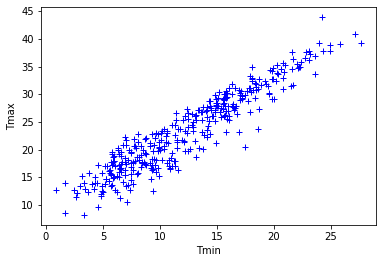

In [3]:
# In the case of Linear regression with one variable

plt.plot(X, y, 'b+') # We can use scatter function : plt.scatter(X, y, s = 20, c = 'b', marker = '+') 
plt.xlabel(names[0])
plt.ylabel(names[len(names)-1])
plt.show()

## 4. Cost Function
For one training example $(x^{i}, y^{i})$ : <br>

$$ \hat{y}^{i} = h_{w,b}(x^i) = w_1x_1^i + w_2x_2^i + ... + w_nx_n^i + b = x^i w + b $$

The loss function is defined as : <br>

$$ Loss(x^i , y^i) = (\hat{y}^{i} - y^{i})^2 $$

The cost function is then defined by summing $Loss$ over all training examples :

$$cost(w, b) = J(w, b) = \frac{1}{2m} \sum_{i=1}^m Loss(x^{i}, y^{i}) = \frac{1}{2m} \sum_{i=1}^m (h_{w,b}(x^i) - y^{i})^2 $$
<br>
The vectorized form of the cost function is as follow :
$$ J(w,b) = \frac{1}{2m} [(Xw + b) - y]^T [(Xw + b) - y]$$

The objective of linear regression is to minimize the cost function given training dataset $ (X, y)$

Below we implement a function to calculate $J(w, b)$.

In [4]:
def compute_cost(X, y, w, b):
    """
    Compute cost for linear regression with multiple variables
    
    Arguments:
    X -- Dataset examples, a matrix of size (number of examples , number of predictor variables)
    y -- Real labels, a vector of size (number of examples, 1)
    w -- weights, a vector of size (number of variables, 1)
    b -- bias, a scalar

    Return:
    cost -- cost for linear regression
    """
    m = X.shape[0]
    h = np.matmul(X, w) + b
    cost = np.sum((h - y) * (h - y)) / (2*m)
    return cost

## 5. Gradient Descent

In this part we implement Gradient Descent Algorithm to fit the linear regression parameters $w$ and $b$ to our dataset. That is to minimize the cost function.

### Update equations

$$ w_j = w_j - \alpha \frac{\partial J}{\partial w_j} = w_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{w,b}(x^i) - y^{i})x_j^i  $$ <br>
$$ b = b - \alpha \frac{\partial J}{\partial b} = b - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{w,b}(x^i) - y^{i}) $$


In [5]:
def gradient_descent (X, y, w, b, alpha, num_iters):
    """
    This function is an implementation of gradient descent 
    to learn parameters w, b for linear regression with multiple variables 
    to fit the training dataset (X, y)
    
    Arguments:
    X -- Dataset examples, a matrix of size (number of examples , number of variables)
    y -- Real labels, a vector of size (number of examples, 1)
    w -- weights, a vector of size (number of variables, 1)
    b -- bias, a scalar
    alpha -- learning rate of the gradient descent
    num_iters -- number of iterations of the optimization loop
    
    Returns:
    w, b -- weights w and bias b
    costs -- list of all the costs computed during the optimization.
    """
    m = X.shape[0]
    costs = []
    for i in range(num_iters):
        h = np.matmul(X, w) + b
        dw = np.matmul(X.T, h-y) / m
        db = np.sum (h - y) / m
        w = w - alpha * dw
        b = b - alpha * db
        cost = compute_cost(X, y, w, b)
        costs.append(cost)
        if i%100 == 0:
            print("Cost after iteration " + str(i+1) + " : " + str(cost))
    return w, b, costs

In [6]:
def predict (x, w, b):
    """
    This function estimates the output y of a given example x
    using learned parameters w, b.
    
    Arguments:
    x -- data examlpe, a vector of size (1, number of variables), may be a matrix
    w -- weights, a vector of size (number of variables, 1)
    b -- bias, a scalar
    
    
    Returns:
    y -- estimated value, a scalar, may be a vector
    
    """
    return np.matmul(x, w) + b

## 6. Assess model performance (quality) : R Squared

$$R^2 = 1 - \frac{\sum_{i=1}^{m} (y^{i} - \hat{y}^{i})^2}{\sum_{i=1}^{m} (y^{i} - \bar{y})^2} $$

In [7]:
def rsquared(X, y):
    ...
    
    return r2

# Running Linear Regression with one var

In [8]:
# Initialize fitting parameters w and b
w = np.zeros((n, 1))
b = 0

# Compute initial cost
J = compute_cost(X, y, w, b)
print("Initial cost = ", J)

# Set Hyper-parameter alpha and number of iterations
alpha = 0.01
num_iters = 10000

Initial cost =  298.4723835616438


In [9]:
# Run Gradient Descent
w, b, costs = gradient_descent (X, y, w, b, alpha, num_iters)

Cost after iteration 1 : 207.4571226441101
Cost after iteration 101 : 7.29772117988745
Cost after iteration 201 : 6.057513221035779
Cost after iteration 301 : 5.17314124178856
Cost after iteration 401 : 4.542510070543843
Cost after iteration 501 : 4.0928173128831995
Cost after iteration 601 : 3.772148773944201
Cost after iteration 701 : 3.543485291792081
Cost after iteration 801 : 3.380429108472894
Cost after iteration 901 : 3.2641564152190856
Cost after iteration 1001 : 3.181244262356848
Cost after iteration 1101 : 3.122120964359052
Cost after iteration 1201 : 3.0799611090728893
Cost after iteration 1301 : 3.049897606901267
Cost after iteration 1401 : 3.028459815981719
Cost after iteration 1501 : 3.0131728784557237
Cost after iteration 1601 : 3.0022720137257375
Cost after iteration 1701 : 2.9944987856570426
Cost after iteration 1801 : 2.988955824056783
Cost after iteration 1901 : 2.985003228940516
Cost after iteration 2001 : 2.9821846981117246
Cost after iteration 2101 : 2.98017484994

In [10]:
# Print learned parameters 
print("W = ", w)
print("b = ", b)

W =  [[1.20297712]]
b =  8.586419499610916


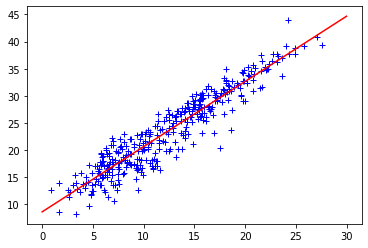

In [11]:
# Plot the linear fit

xl = np.linspace(0, 30, 100)
yl = xl * w[0, 0] + b
plt.plot(X[:, 0], y, 'b+', xl, yl, 'r')
plt.show()

In [12]:
# Predict using the linear model

tmin = np.array([12])
tmax = predict(tmin, w, b)
print(tmax)

[23.02214497]


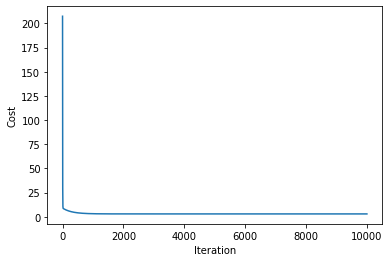

In [13]:
# Visualize costs over iterations

iters = np.arange(len(costs))
plt.plot(iters, costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# Linear Regression using sklearn

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
LR = LinearRegression()
LR.fit(X, y)

# Learned param
w = LR.coef_
b = LR.intercept_

print("W = ", w)
print("b = ", b)

# Model performance (quality)

r2 = LR.score(X, y)
print("Score = ", r2)

W =  [[1.2029771]]
b =  [8.58641988]
Score =  0.8824982309186143


In [17]:
# Predict using the linear model

tmin = np.array([[12]])
tmax = LR.predict(tmin)
print(tmax)

[[23.02214504]]


# Using Normal Equation

In [18]:
A = np.ones((X.shape[0], 1))
X2 = np.concatenate((X, A), axis=1)
W = np.matmul(np.matmul(np.linalg.inv(np.matmul(X2.T, X2)) , X2.T), y)
print(W)

[[1.2029771 ]
 [8.58641988]]


# Running Linear Regression with multiple var

## Loading Data

In [19]:
# Dataset for Linear Regression with multiple variables
filename = 'solar_radiation_meknes_data.txt'

# Read Data
data = np.genfromtxt(filename , delimiter=',' , skip_header = 1)

# Read Header names
f = open(filename, 'r')
names = f.readline().strip().split(',')

n = data.shape[1]
X = data[:, 0:n-1]
y = data[:, n-1]

m = X.shape[0]
n = X.shape[1]

y = y.reshape((m, 1))

print("Number of examples : ", m)
print("Number of attributes : ", n)
print("Variables Name : ", names)
print()
print("X shape : ", X.shape)
print("y shape : ", y.shape)

Number of examples :  365
Number of attributes :  3
Variables Name :  ['TAO', 'Dec', 'Tmax', 'DGSR']

X shape :  (365, 3)
y shape :  (365, 1)


## Plotting the Data

We use here a scatter plot to visualize the data.

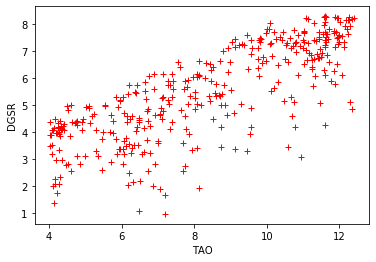

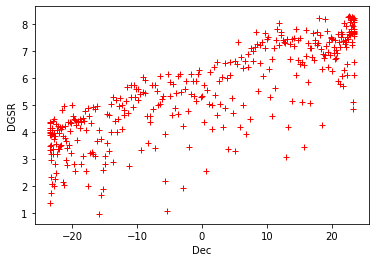

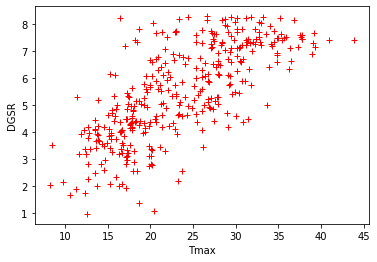

In [20]:
# In the case of Linear regression with multiple variables

for i in range(X.shape[1]):
    plt.plot(X[:, i], y, 'r+')
    plt.xlabel(names[i])
    plt.ylabel(names[len(names)-1])
    plt.show()

    
# We can use subplot
#plt.figure(1)
#plt.subplot(1, 3, 1)

In [21]:
# Initialize fitting parameters w and b
w = np.zeros((n, 1))
b = 0

# Compute initial cost
J = compute_cost(X, y, w, b)
print("Initial cost = ", J)

# Set Hyper-parameters alpha and number of iterations
alpha = 0.001
num_iters = 200

Initial cost =  16.32441926983904


In [22]:
# Run Gradient Descent
w, b, costs = gradient_descent (X, y, w, b, alpha, num_iters)

Cost after iteration 1 : 2.2015493607637473
Cost after iteration 101 : 0.5171204326831177


In [23]:
# Print learned parameters 
print("W = ", w)
print("b = ", b)

W =  [[0.2344775 ]
 [0.00585874]
 [0.14596499]]
b =  0.02523879441031081


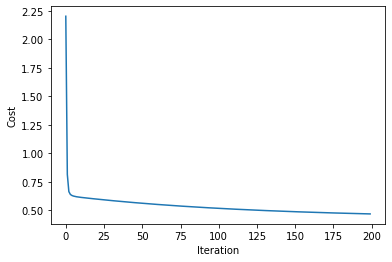

In [24]:
# Visualize costs over iterations

iters = np.arange(len(costs))
plt.plot(iters, costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [25]:
LR = LinearRegression()
LR.fit(X, y)

# Learned param
w = LR.coef_
b = LR.intercept_

print("W = ", w)
print("b = ", b)

W =  [[0.09299376 0.04883977 0.07527509]]
b =  [2.91280498]


In [26]:
score = LR.score(X, y)
print(score)

0.7215008879266778
